In [20]:
import spacy
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train =pd.read_csv('train101.csv')

In [4]:
test = pd.read_csv('text101.csv')

In [5]:
train.head()

,Unnamed: 0,description_x,description_y,ticker_x,ticker_y,same_security
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True


In [6]:
test.head()

,test_id,description_x,description_y,same_security
0,0,semtech corp,semtech corporation,NaN
1,1,vanguard mid cap index,vanguard midcap index - a,NaN
2,2,spdr gold trust gold shares,spdr gold trust spdr gold shares,NaN
3,3,vanguard total bond index adm,vanguard total bond market index,NaN
4,4,oakmark international fund class i,oakmark international cl i,NaN


In [7]:
train.shape

(2142, 6)

In [8]:
test.shape

(516, 4)

In [10]:
train.rename(columns ={'description_x':'question1','description_y':'question2','same_security':'is_similar'},inplace=True)

In [11]:
train.head()

,Unnamed: 0,question1,question2,ticker_x,ticker_y,is_similar
0,0,first trust dow jones internet,first trust dj internet idx,FDN,FDN,True
1,1,schwab intl large company index etf,schwab strategic tr fundamental intl large co ...,FNDF,FNDF,True
2,2,vanguard small cap index adm,vanguard small-cap index fund inst,VSMAX,VSCIX,False
3,3,duke energy corp new com new isin #us4 sedol #...,duke energy corp new com new isin #us26441c204...,DUK,DUK,True
4,4,visa inc class a,visa inc.,V,V,True


In [12]:
test.rename(columns={'description_x':'question1','description_y':'question2','same_security':'is_similar'},inplace=True)

In [13]:
test.head()

,test_id,question1,question2,is_similar
0,0,semtech corp,semtech corporation,NaN
1,1,vanguard mid cap index,vanguard midcap index - a,NaN
2,2,spdr gold trust gold shares,spdr gold trust spdr gold shares,NaN
3,3,vanguard total bond index adm,vanguard total bond market index,NaN
4,4,oakmark international fund class i,oakmark international cl i,NaN


In [17]:
is_sim = train['is_similar'].value_counts()

In [18]:
is_sim

True     1613
False     529
Name: is_similar, dtype: int64

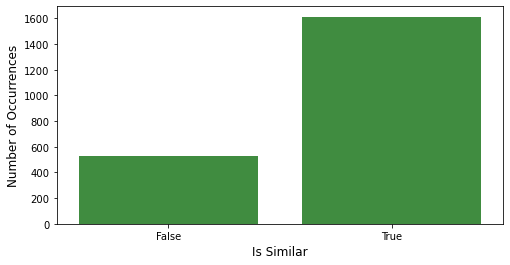

In [23]:
fig , ax= plt.subplots(figsize=(8,4))
sns.barplot(is_sim.index, is_sim.values, alpha=0.8, color='g')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Similar', fontsize=12)
plt.show()

In [24]:
all_ques_df = pd.DataFrame(pd.concat([train['question1'], train['question2']]))
all_ques_df.columns =["questions"]

all_ques_df["num_of_words"] = all_ques_df["questions"].apply(lambda x: len(str(x).split()))

In [25]:
all_ques_df

,questions,num_of_words
0,first trust dow jones internet,5
1,schwab intl large company index etf,6
2,vanguard small cap index adm,5
3,duke energy corp new com new isin #us4 sedol #...,10
4,visa inc class a,4
...,...,...
2137,delta air lines inc dela new,6
2138,cognizant tech solutions corp,4
2139,fid conservative income bond fund,5
2140,lilly eli &co com npv,5


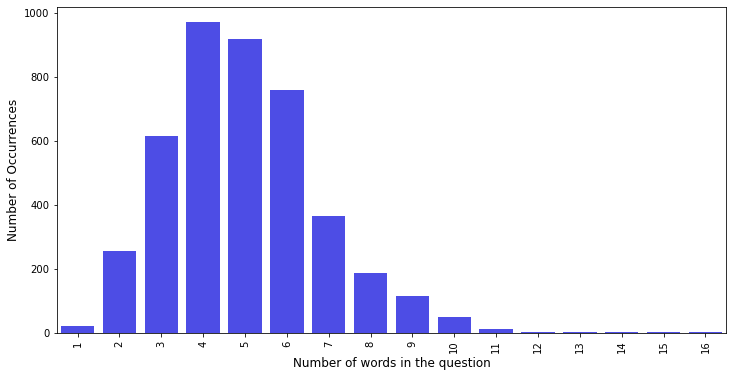

In [27]:
count_str = all_ques_df["num_of_words"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(count_str.index, count_str.values, alpha=0.8, color='b')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the question', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [29]:


all_ques_df["num_of_chars"] = all_ques_df["questions"].apply(lambda x: len(str(x)))
count_str = all_ques_df["num_of_chars"].value_counts()

count_str

20    254
30    182
28    177
27    162
24    161
     ... 
72      1
61      1
66      1
70      1
4       1
Name: num_of_chars, Length: 70, dtype: int64

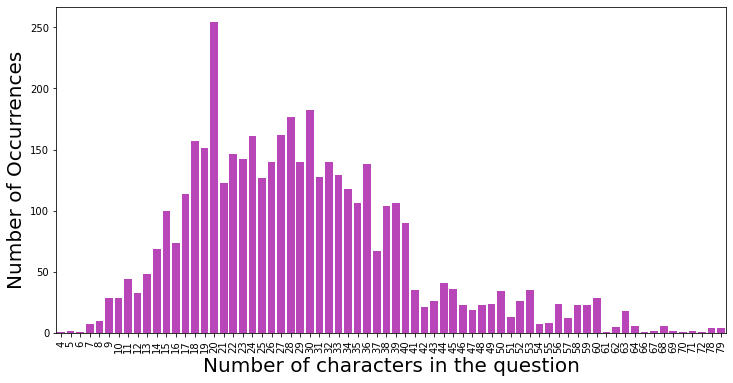

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(count_str.index, count_str.values, alpha=0.8, color='m')
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Number of characters in the question', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()      

# del all_ques_df     

